In [2]:
import pandas as pd

In [94]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
start = datetime.datetime(2021, 1, 1)
end = datetime.datetime(2022, 12, 31)
df = web.DataReader(['TSLA','F'], 'yahoo', start, end)
df.tail()
df["Date"] = df.index
df = df[["Date", "Open", "High", 
             "Low", "Close", "Adj Close", "Volume"]]
df.reset_index(drop=True, inplace=True)
print(df.head())

Attributes       Date        Open              High               Low        \
Symbols                      TSLA     F        TSLA     F        TSLA     F   
0          2020-12-31  699.989990  8.84  718.719971  8.86  691.119995  8.78   
1          2021-01-04  719.460022  8.81  744.489990  8.84  717.190002  8.43   
2          2021-01-05  723.659973  8.47  740.840027  8.72  719.200012  8.46   
3          2021-01-06  758.489990  8.79  774.000000  8.94  749.099976  8.68   
4          2021-01-07  777.630005  8.94  816.989990  9.08  775.200012  8.88   

Attributes       Close         Adj Close                Volume              
Symbols           TSLA     F        TSLA         F        TSLA           F  
0           705.669983  8.79  705.669983  8.701225  49649900.0  40176500.0  
1           729.770020  8.52  729.770020  8.433952  48638200.0  85043100.0  
2           735.109985  8.65  735.109985  8.562639  32245200.0  70127800.0  
3           755.979980  8.84  755.979980  8.750721  44700000.

In [128]:
df.index

RangeIndex(start=0, stop=253, step=1)

In [95]:
df.to_csv('stock.csv', mode='a', index=False)

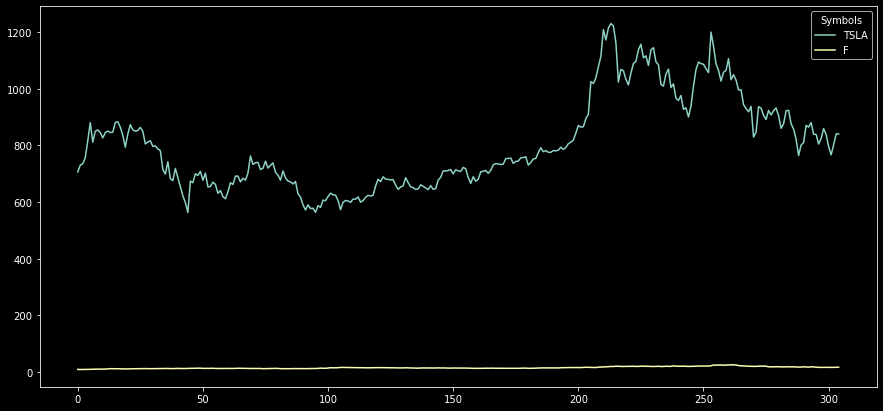

In [96]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
df['Adj Close'].plot()

In [97]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

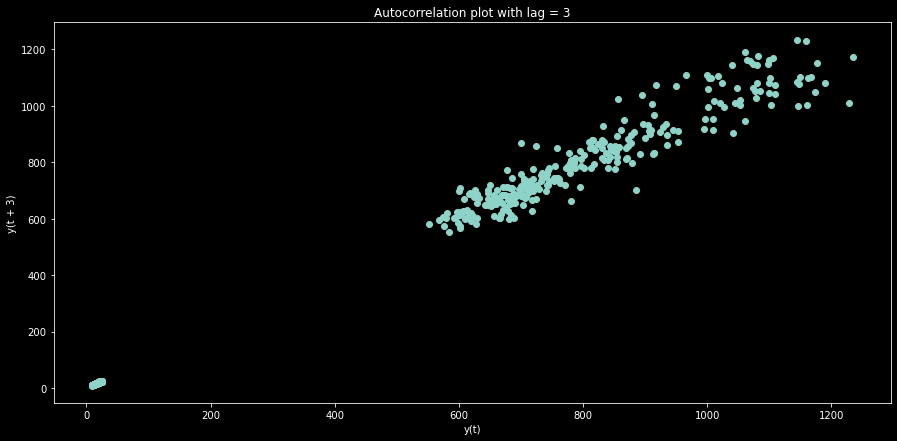

In [98]:
plt.figure()
lag_plot(df['Open'], lag=3)
plt.title('Autocorrelation plot with lag = 3')
plt.show()

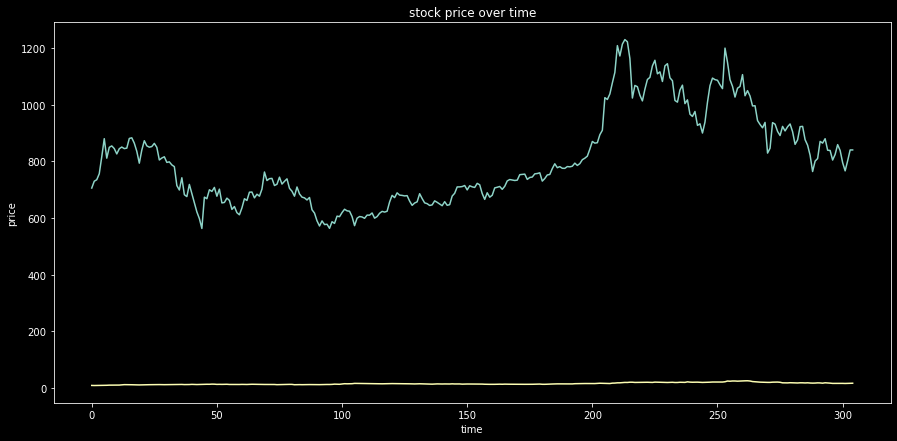

In [99]:
plt.plot(df["Close"])
plt.title("stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [100]:
import pandas as pd
df = pd.read_csv("F.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-03-17,12.340000,12.700000,12.220000,12.690000,12.561837,109324400
1,2021-03-18,12.700000,13.010000,12.440000,12.490000,12.363857,76733300
2,2021-03-19,12.850000,12.950000,12.550000,12.830000,12.700423,90885200
3,2021-03-22,12.850000,12.930000,12.510000,12.850000,12.720222,81362100
4,2021-03-23,12.570000,12.680000,12.120000,12.210000,12.086685,73020200
...,...,...,...,...,...,...,...
248,2022-03-10,16.110001,16.410000,15.760000,16.330000,16.330000,72992600
249,2022-03-11,16.400000,16.480000,16.010000,16.040001,16.040001,54918300
250,2022-03-14,16.090000,16.230000,15.510000,15.740000,15.740000,66341700
251,2022-03-15,15.770000,16.139999,15.530000,16.059999,16.059999,65263700


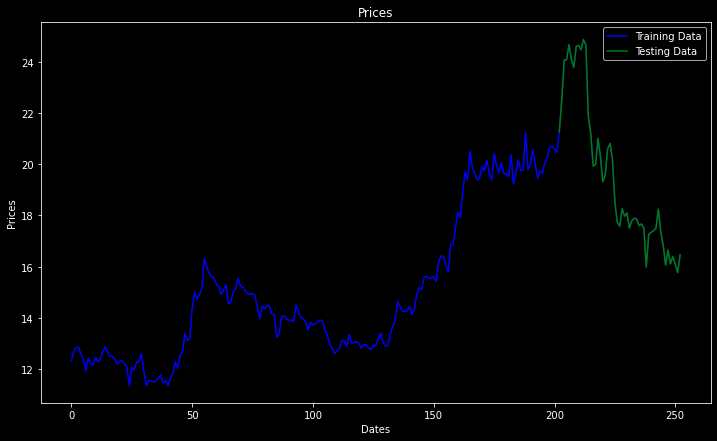

In [101]:
import matplotlib.pyplot as plt
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
#plt.xticks(np.arange(0,7982, 1300), df['Date'][0:7982:1300])
plt.legend()

In [102]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df['Adj Close'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.Adj Close   No. Observations:                  252
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -174.001
Method:                       css-mle   S.D. of innovations              0.483
Date:                Thu, 17 Mar 2022   AIC                            356.002
Time:                        11:00:52   BIC                            370.120
Sample:                             1   HQIC                           361.683
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0159      0.032      0.504      0.614      -0.046       0.078
ar.L1.D.Adj Close    -0.5957      0.453     -1.314      0.189      -1.484       0.293
ma.L1.D.Adj Close     0.6602      0.423      1.559      0.119      -0.170       1.490
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.6786           +0.0000j            1.6786            0.5000
MA.1           -1.5148           +0.0000j            1.5148            0.5000
-----------------------------------------------------------------------------
"""

In [103]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
#from sklearn.metrics import mean_absolute_percentage_error 
model=ARIMA(df['Adj Close'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values
history = [int(x) for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
#error2 = smape_kun(test_ar, predictions)
#print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 0.822


In [104]:
#!pip install scikit-learn==0.24

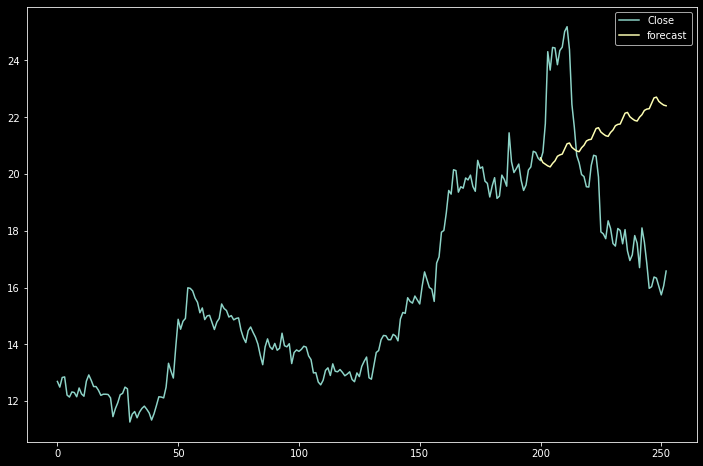

In [138]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Close'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
df['forecast']=results.predict(start=200,end=253,dynamic=True)
df[['Close','forecast']].plot(figsize=(12,8))